<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/79_C_DOE_DCA_Ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DCA**
### **1.1 Librerias básicas**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
print("Setup Complete")

Setup Complete


#  **1. Actividad 1: DCA - Parte I - usando Python**

###  **Problema 1:**
+  Una compañía compra materia prima a tres proveedores. _La pureza_ de esta materia prima es un importante en la calidad del producto terminado.
+ El departamento de calidad quiere determinar si existen diferencias en la pureza de la materia prima debido al proveedor.
+ Se selecciona al azar 4 muestras de materia prima de cada proveedor de la última compra realizada en el mes, los resultados fueron los siguientes.


### <span style="color:blue">**Tabla de datos**</span>

|Proveedor A|	Proveedor B|	Proveedor C|
|:--:|:--:|:--:|
|94	|               88	       |       95
|95	|              92	       |      96
|93	|             86	       |     96
|96	|            87	       |    92

# **a. Los niveles del Factor como listas: Ingresamos los datos como filas**

In [ ]:
# **a. Los niveles del Factor como listas**
Proveedor_A = [94, 95, 93, 96]
Proveedor_B =  [88, 92, 86, 87]
Proveedor_C = [95, 96, 96, 92]

# **b. Construimos el diccionario con los niveles del factor**

In [ ]:
# **b. Construimos el diccionario con los niveles del factor**
dic_Proveedor = {'A':Proveedor_A, 'B':Proveedor_B, 'C':Proveedor_C }

# **c. Nuestro DataFrame**

In [ ]:
# **c. Nuestro DataFrame**
Pureza = pd.DataFrame(dic_Proveedor)
Pureza

,A,B,C
0,94,88,95
1,95,92,96
2,93,86,96
3,96,87,92


# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**

In [ ]:
# **d. Accediendo al atributo shape, el cual me muestra la cantidad de filas y columnas**
Pureza.shape

(4, 3)

In [ ]:
# igual resultad con accediendo al atributo index
Pureza.index

RangeIndex(start=0, stop=4, step=1)

# **e. Accediendo al atributo columns**

In [ ]:
# **e. Accediendo al atributo columns**
Pureza.columns

Index(['A', 'B', 'C'], dtype='object')

# **f. accediendo al atributo tipo de datos de cada columna**

In [ ]:
# **f. accediendo al atributo tipo de datos de cada columna**
Pureza.dtypes

A    int64
B    int64
C    int64
dtype: object

# **g. Análisis descriptivo de los datos del DataFrame**

In [ ]:
# **g. Análisis descriptivo de los datos del DataFrame**
Pureza.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,94.500000,88.250000,94.750000
std,1.290994,2.629956,1.892969
min,93.000000,86.000000,92.000000
25%,93.750000,86.750000,94.250000
50%,94.500000,87.500000,95.500000
75%,95.250000,89.000000,96.000000
max,96.000000,92.000000,96.000000


# **h. Haciendo el analisis boxplot**

<Axes: >

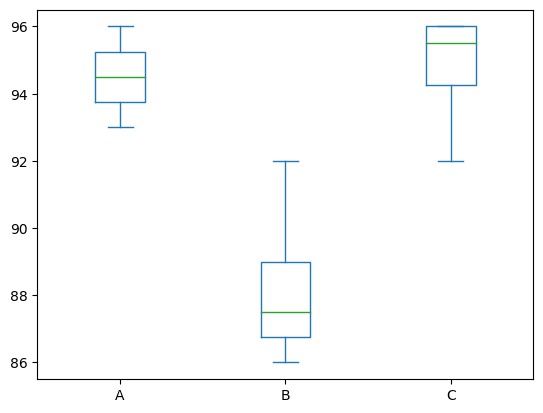

In [ ]:
# **h. Haciendo el analisis descriptivo**
Pureza.plot.box()

In [ ]:
# Número de observaciones por grupo
# ==============================================================================
Pureza.groupby('A').size()

A
93    1
94    1
95    1
96    1
dtype: int64

# **i. Reescribiendo el DataFrame**

In [ ]:
# **i. Reescribiendo el DataFrame**
Proveedor = (['A']*4+['B']*4+['C']*4)
Proveedor

['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C']

In [ ]:
Pureza_2 = [94, 95, 93, 96, 88, 92, 86, 87, 95, 96, 96, 92]

In [ ]:
DCA  = pd.DataFrame({'Proveedor': Proveedor, 'Pureza_2': Pureza_2})
DCA

,Proveedor,Pureza_2
0,A,94
1,A,95
2,A,93
3,A,96
4,B,88
5,B,92
6,B,86
7,B,87
8,C,95
9,C,96


# **j. Analisis descriptivo de la variable**

In [ ]:
# **j. Analisis descriptivo de la variable**
DCA.describe()

,Pureza_2
count,12.000000
mean,92.500000
std,3.630677
min,86.000000
25%,91.000000
50%,93.500000
75%,95.250000
max,96.000000


## **Precio Desgaste y desviación típica por Tipo_Cuero**

In [ ]:
## **Precio Desgaste y desviación típica por Tipo_Cuero**
DCA.groupby('Proveedor')['Pureza_2'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Proveedor,,,,
A,94.50,1.290994,93,96
B,88.25,2.629956,86,92
C,94.75,1.892969,92,96


## **Cuartiles**

In [ ]:
## **Cuartiles**
DCA.groupby('Proveedor')['Pureza_2'].quantile([.10, .25, .50, .75, .90])

Proveedor      
A          0.10    93.30
           0.25    93.75
           0.50    94.50
           0.75    95.25
           0.90    95.70
B          0.10    86.30
           0.25    86.75
           0.50    87.50
           0.75    89.00
           0.90    90.80
C          0.10    92.90
           0.25    94.25
           0.50    95.50
           0.75    96.00
           0.90    96.00
Name: Pureza_2, dtype: float64

# **k. BoxPlot para DCA**

<Axes: title={'center': 'Pureza_2 vs Proveedor'}, xlabel='Proveedor', ylabel='Pureza_2'>

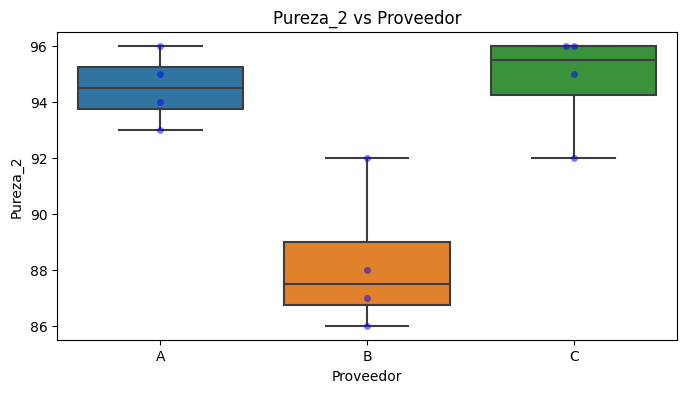

In [ ]:
# **k. BoxPlot para DCA**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Pureza_2 vs Proveedor')
sns.boxplot(x="Proveedor", y=Pureza_2, data=DCA,ax=ax)
sns.swarmplot(x="Proveedor", y="Pureza_2", data=DCA, color='b', alpha=0.5, ax=ax)

# **l. Análisis de Varianza**

In [ ]:
# **l. Análisis de Varianza**
modelDCA = ols("Pureza_2 ~ C(Proveedor)", data = DCA).fit() # Construimos el modelo
anova_result = sm.stats.anova_lm(modelDCA, typ=2)
print ('La Anova para el DCA es')
print(anova_result)

La Anova para el DCA es
              sum_sq   df          F    PR(>F)
C(Proveedor)   108.5  2.0  13.376712  0.002014
Residual        36.5  9.0        NaN       NaN


# **Imprimelo en forma de tabla**

In [ ]:
# **Imprimelo en forma de tabla**
anova_result.T

,Proveedor,Residual
sum_sq,108.500000,36.5
df,2.000000,9.0
F,13.376712,NaN
PR(>F),0.002014,NaN


# **m. Análisis de Varianza2**

In [ ]:
# **m. Análisis de Varianza2**
modeloDCA2 = smf.ols("Pureza_2 ~ C(Proveedor)", data = DCA).fit()
print(modeloDCA2.summary())


                            OLS Regression Results                            
Dep. Variable:               Pureza_2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 25 Aug 2023   Prob (F-statistic):            0.00201
Time:                        20:54:37   Log-Likelihood:                -23.702
No. Observations:                  12   AIC:                             53.40
Df Residuals:                       9   BIC:                             54.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            94.5000      1.00

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **n. Análisis de Varianza3**

In [ ]:
# **n. Análisis de Varianza3** NO SIRVE PARA NADA
modeloDCA3 = smf.ols("Pureza_2 ~ C(Proveedor)-1", data = DCA).fit()
print(modeloDCA3.summary())

                            OLS Regression Results                            
Dep. Variable:               Pureza_2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 25 Aug 2023   Prob (F-statistic):            0.00201
Time:                        20:56:39   Log-Likelihood:                -23.702
No. Observations:                  12   AIC:                             53.40
Df Residuals:                       9   BIC:                             54.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(Proveedor)[A]    94.5000      1.007     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **o. Comparaciones Múltiples**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-6.25,0.0045,-10.2258,-2.2742,True
A,C,0.25,0.9832,-3.7258,4.2258,False
B,C,6.5,0.0035,2.5242,10.4758,True


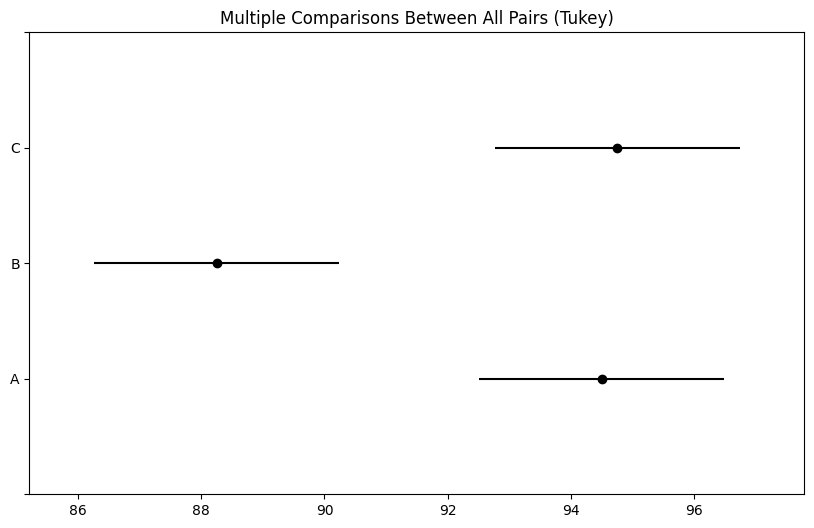

In [ ]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCA["Pureza_2"],     # Data
                          groups=DCA["Proveedor"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **p. Normalidad de los Residuos: Shapiro Wilks y Gráfico de Probabilidad para los residuos**

## **p1. Prueba Analítica con Shapiro**

In [ ]:
# **Forma 1. Shapiro Wilks**
w, p_value = stats.shapiro(modelDCA.resid)
print('El estadistico de Prueba para shapiro wilks w =', w)
print('El valor p para el estadistico de prueba es p_value =', p_value)
print('Para que se cumpla el supuesto de normalidad se debe cumplir que p_value =', f'{p_value}>0.05')


El estadistico de Prueba para shapiro wilks w = 0.9716333150863647
El valor p para el estadistico de prueba es p_value = 0.927138090133667
Para que se cumpla el supuesto de normalidad se debe cumplir que p_value = 0.927138090133667>0.05


## **p2. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Todos los datos**
$$\sum_{x =0}^{\infty}sin(x)+x^2=3$$

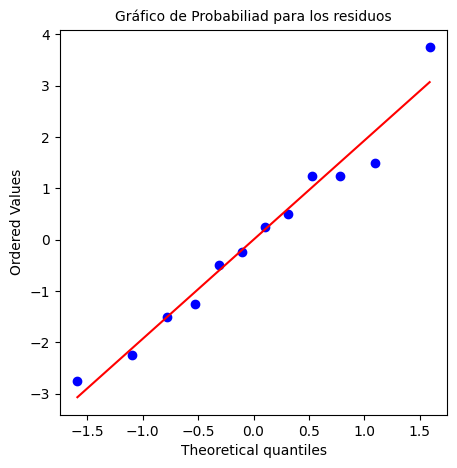

In [ ]:
# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelDCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por secciones**

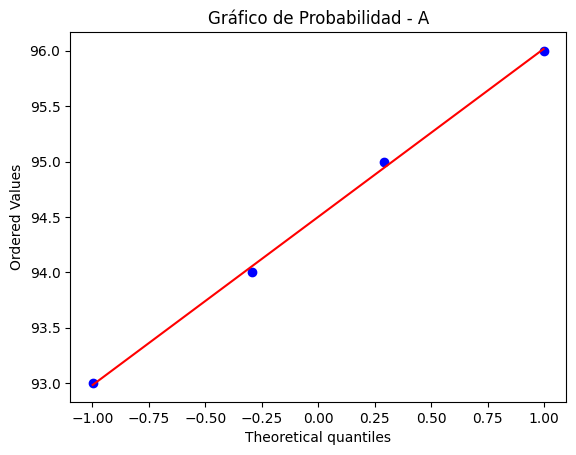

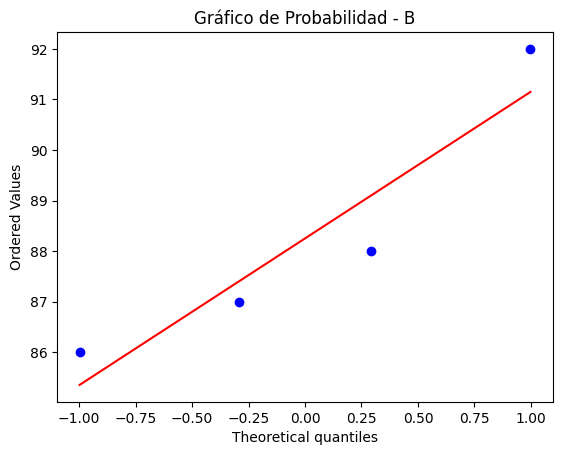

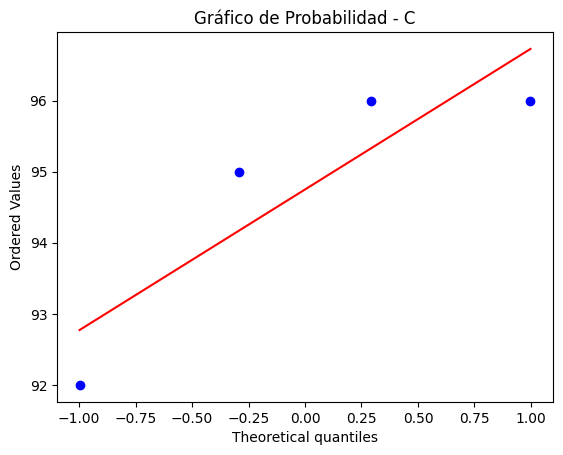

In [ ]:
unique_Proveedor = DCA['Proveedor'].unique()
for Proveedor in unique_Proveedor:
    stats.probplot(DCA[DCA['Proveedor'] == Proveedor]['Pureza_2'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+ Proveedor)
    plt.show()

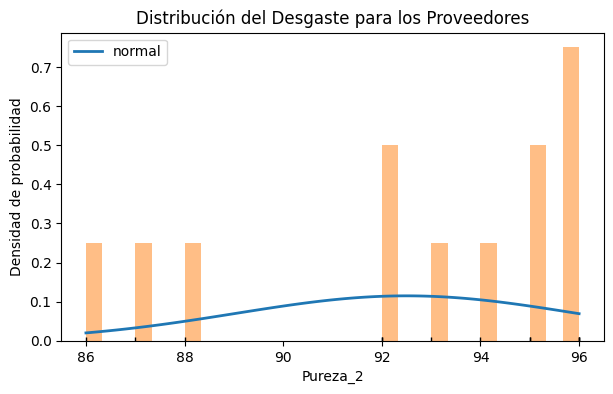

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Pureza_2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Pureza_2), max(Pureza_2), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Pureza_2, density=True, bins=30,  alpha=0.5)
ax.plot(Pureza_2, np.full_like(Pureza_2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Desgaste para los Proveedores')
ax.set_xlabel('Pureza_2')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

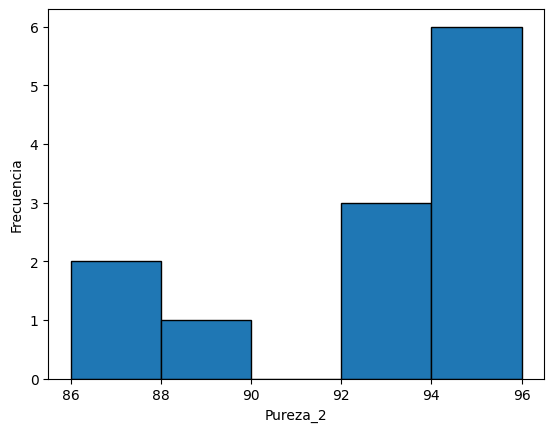

In [ ]:
# **Histograma de Residuos**
plt.hist(DCA['Pureza_2'], bins='auto', histtype='bar', ec='k')

plt.xlabel("Pureza_2")
plt.ylabel('Frecuencia')
plt.show()

# **Histograma de Residuos**

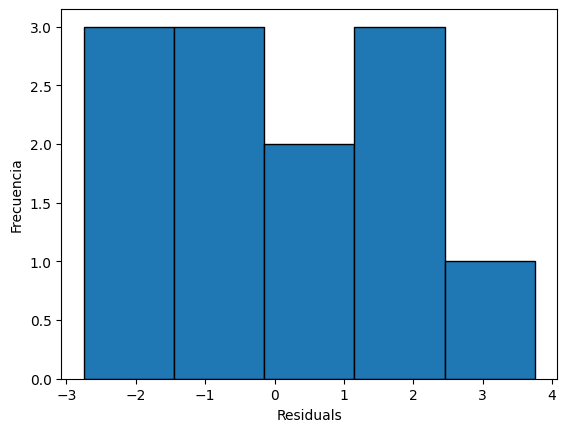

In [ ]:
# **Histograma de Residuos**
plt.hist(modelDCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Pureza_3 =modelDCA.resid
Pureza_3
Pureza_3.describe()

count    1.200000e+01
mean    -4.736952e-15
std      1.821588e+00
min     -2.750000e+00
25%     -1.312500e+00
50%      0.000000e+00
75%      1.250000e+00
max      3.750000e+00
dtype: float64

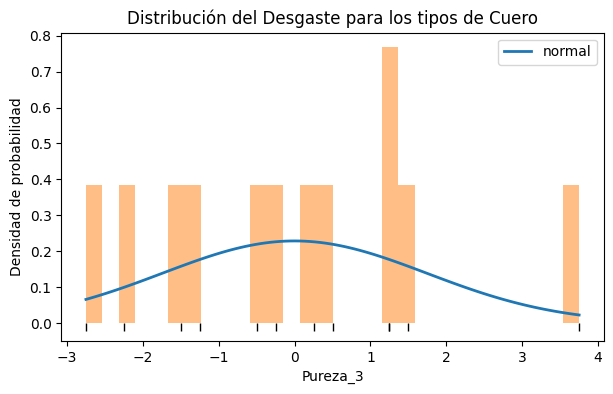

In [ ]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Pureza_3)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Pureza_3), max(Pureza_3), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Pureza_3, density=True, bins=30,  alpha=0.5)
ax.plot(Pureza_3, np.full_like(Pureza_3, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Desgaste para los tipos de Cuero')
ax.set_xlabel('Pureza_3')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

# **Gráfico Q-Q**

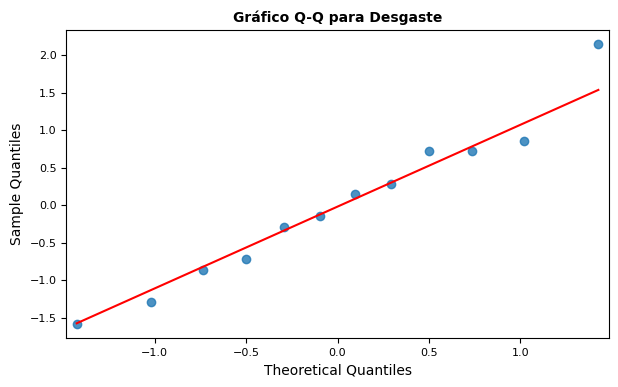

In [ ]:
# **Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))

sm.qqplot(Pureza_3, fit   = True, line  = 'q', alpha = 0.8, lw    = 5, ax = ax)
ax.set_title('Gráfico Q-Q para Desgaste', fontsize = 10,
             fontweight = "bold")

ax.tick_params(labelsize = 8)

# **q. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# q. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCA['Pureza_2'][DCA['Proveedor'] == 'A'],
             DCA['Pureza_2'][DCA['Proveedor'] == 'B'],
             DCA['Pureza_2'][DCA['Proveedor'] == 'C']
            )

LeveneResult(statistic=0.2837837837837837, pvalue=0.7594240938617943)